# Homework 6: Neural Networks - CNNs and RNNs

## Problem 1: Convolutional Neural Network Basics

In convolutional neural networks, a convolution is a multiplicative operation on a local region of values. Convolutional layers have been very useful in image classification, as it allows the network to retain local spatial information for feature extraction.

### Part A: Understanding Convolutional Operations

For the following 2D matrix:

| | | |
|--|--|--|
|1|2|2|
|3|1|2|
|4|1|0|

Use the following 2x2 kernel to perform a 2D convolution on the matrix:

| | |
|--|--|
|2|1|
|1|2|

**Compute this operation by hand assuming a) valid, b) same, and c) full border modes. Please indicate what the resulting matrix shape is compared to the original shape. Why?** 

### SOLUTION

A)

| | |
|--|--|
|9|11|
|13|5|
    
B)


| | | |
|--|--|--|
|2|5|6|
|7|9|11|
|11|13|5|

C) 


| | | | |
|--|--|--|--|
|2|5|6|2|
|7|9|11|6|
|11|13|5|4|
|4|9|2|0|

### Part B: Understanding Pooling Operations

Pooling operations are used in convolutional neural networks to reduce the dimensionality of the feature maps and overall network complexity. Two main types of pooling are used in CNNs: AveragePooling and MaxPooling.

**Using the matrix below, write the output of the AveragePooling and MaxPooling operations with a pool size of 2. Then, write the outputs for the same operations, except with a stride size of 1.**


| | | | |
|--|--|--|--|
|1|2|2|4|
|3|1|2|1|
|4|1|0|2|
|5|2|2|1|

### SOLUTION

AveragePooling, pool size 2, stride size 2:

| | |
|--|--|
|1.75|2.25|
|3|1.25|

MaxPooling, pool size 2, stride size 2:

| | |
|--|--|
|3|4|
|5|2|

AveragePooling, pool size 2, stride size 1:

| | | |
|--|--|--|
|1.75|1.75|2.25|
|2.25|1|1.25|
|3|1.25|1.25|

MaxPooling, pool size 2, stride size 1:

| | | |
|--|--|--|
|3|2|4|
|4|2|2|
|5|2|2|

### Part C: Puppy Example

Consider the following image of a dog, which you will find in `dog.jpg`:

![dog](dog.jpg)

Load the image as a 2D Numpy array. Normalize the image by the following operation so that values fall within [-0.5, 0.5].

**Perform the following steps for four images:**

**1. Randomly generate a 3x3 kernel.**

**2. Use this kernel and convolve over the image with same border mode (with [scipy.signal.convolve2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)).**

**3. In the resulting image, set all pixel values less than zero to zero (using np.clip()). In other words:**


`
if x < 0:
    x = 0
else:
    x = x
`

(This is the `ReLU` activation function.)

**4. Plot the image.**

Take a moment to examine the convolved images. You should see that certain features in the puppy are accentuated, while others are de-emphasized. Now consider the effect of performing additional convolution operations on these filtered images and how to they relate to additional layers in a neural network.

### SOLUTION

[[ 0.54371765  0.38223675 -0.56646225]
 [-0.31746643  0.49371786 -2.5358602 ]
 [ 1.53628427  0.30558958  2.19847786]]


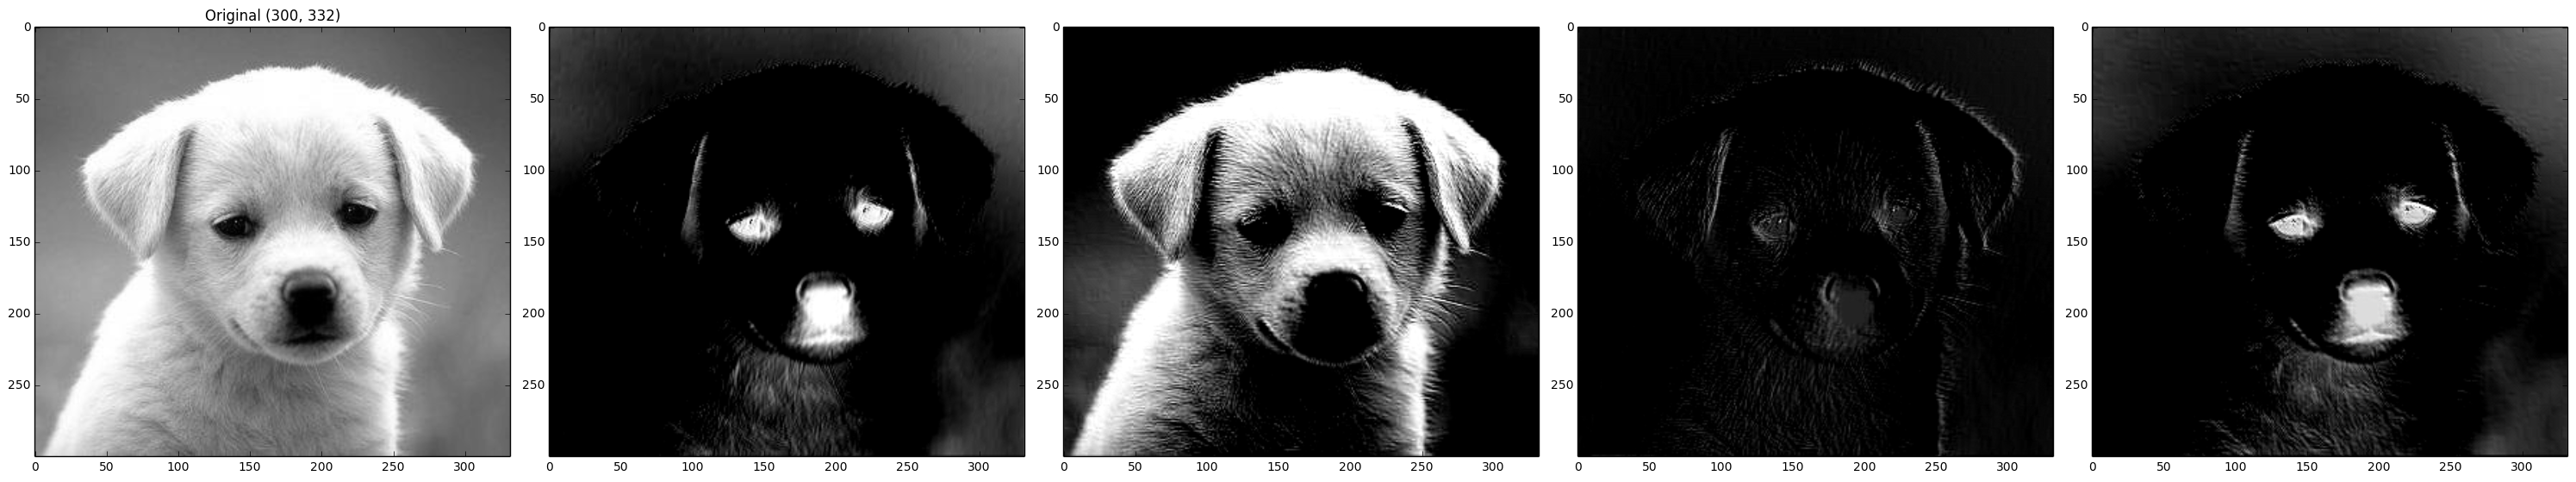

In [3]:
from scipy.signal import convolve2d
import imageio
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

f, ax = plt.subplots(1,5, figsize=(30,30))

img = imageio.imread('dog.jpg')/255.-0.5
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original '+str(img.shape))

kernel = np.random.randn(3,3)
same1 = convolve2d(img, kernel, mode='same')
same1 = np.clip(same1, a_min=0.0, a_max=1.0)
ax[1].imshow(same1, cmap='gray')

kernel = np.random.randn(3,3)
print(kernel)
same2 = convolve2d(img, kernel, mode='same')
same2 = np.clip(same2, a_min=0.0, a_max=1.0)
ax[2].imshow(same2, cmap='gray')

kernel = np.random.randn(3,3)
same3 = convolve2d(img, kernel, mode='same')
same3 = np.clip(same3, a_min=0.0, a_max=1.0)
ax[3].imshow(same3, cmap='gray')

kernel = np.random.randn(3,3)
same4 = convolve2d(img, kernel, mode='same')
same4 = np.clip(same4, a_min=0.0, a_max=1.0)
ax[4].imshow(same4, cmap='gray')

plt.tight_layout()

## Problem 2: Running a Convolutional Neural Network

### Part A: Building the Model

In this first part, you will create a convolutional neural network using Keras to predict the type of object in an image. Load the [CIFAR-10](https://keras.io/datasets/#cifar10-small-image-classification) dataset, which contains 50,000 32x32 training images and 10,000 test images of the same size, with a total of 10 sizes.

Use a combination of the [following layers](https://keras.io/layers/convolutional/): Conv2D, MaxPooling2D, Dense, Dropout and Flatten Layers (not necessarily in this order).
You may use an existing architecture like AlexNet or VGG16, or create one of your own design. However, you should write your own layers and not use a pre-written implementation.
To get you started, we have included a model with one convolutional layer.

Convolutional neural networks are very computationally intensive. We highly recommend that you train your model on JupyterHub using GPUs. On CPUs, this training can take up to several hours. On GPUs, it can be done within minutes.

**Print model.summary() and report the total number of parameters.**

**How does the number of total parameters change (linearly, exponentially) as the number of filters per layer increases?**

**Generate a plot showing this relationship and explain why.**

For instance, start by assigning 32 filters to each Conv2D layer, then 64, 128, etc. and recording the total number of parameters for each model.

**Hint**: Each convolutional layer contains the following number of parameters:

$$
\text{# filters} \times \text{kernel width} \times \text{kernel height} \times \text{# input filters} + \text{# filters} \times 1 \text{(for the bias)}
$$

So for instance, let's say my first convolutional layer has 32 filters with 3x3 size kernels. The input tensor has 3 filters (one for each RGB color channel), so we have:

$$
\text{32 filters} \times \text{3 kernel width} \times \text{3 kernel height} \times \text{3 input filters} + \text{32 filters} \times 1 = 896 \text{ parameters}.
$$


### SOLUTION

In [4]:
import keras
from keras.models import *
from keras.optimizers import *
from keras.layers import *

from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_classes = 10
batch_size = 32
epochs=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

n_filters = 32
model = Sequential()
model.add(Conv2D(n_filters, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(n_filters, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

#model = Model(inputs = input_layer, outputs = x)
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

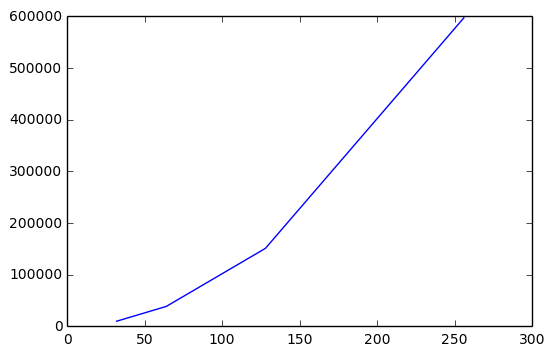

In [5]:
filters = [32, 64, 128, 256]
params = [10144, 38720, 151168, 597248]
plt.plot(filters, params)

As we can see from this plot of 32, 64, 128, and 256 filters per layer, the total number of parameters increases exponentially with the number of filters.

## Part B: Training and Evaluating the Model
Now train your model. You can choose to train your model for as long as you'd like, but you should aim for at least 10 epochs. Your validation accuracy should exceed 70%. Training for 10 epochs on a CPU should take about 30-60 minutes.

### SOLUTION

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

## Part C: Visualizing the Feature Maps

We would also like to examine the feature maps that are produced by the intermediate layers of the network.

**Using your model, extract 9 feature maps from an intermediate convolutional layer of your choice and plot the images in a 3x3 grid. Also plot your original input image.**

You may use the helper function `get_feature_maps()` to extract weights.

In [8]:
import matplotlib.pyplot as plt
from keras import Model
%matplotlib inline

def get_feature_maps(model, layer_id, input_image):
    model_ = Model(inputs=[model.input], outputs=[model.layers[layer_id].output])
    return model_.predict(np.expand_dims(input_image, axis=0))[0,:,:,:].transpose((2,0,1))

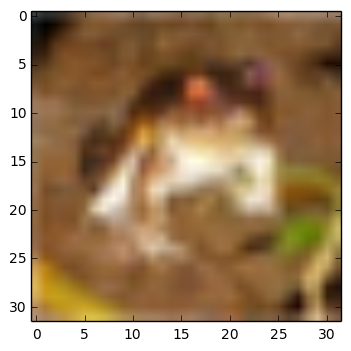

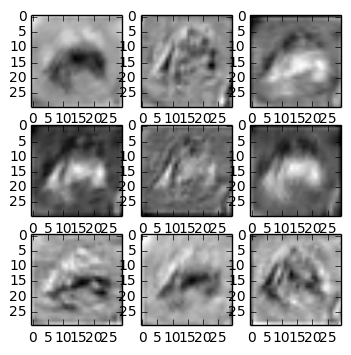

In [9]:
image_id = 0
input_image = x_train[image_id,:,:,:]
maps = get_feature_maps(model, 2, input_image)[0:10]
plt.imshow(input_image)
f, ax = plt.subplots(3,3, figsize=(4,4))

for i, axis in enumerate(ax.ravel()):
    axis.imshow(maps[i], cmap='gray')


# Problem 3: Recurrent Neural Networks


## Learning to add numbers with a recurrent neural network

In this exercise, we will be using using recurrent neural network to add three digit numbers, encoded as character strings. 

For example, given a string '223+12', we would like to return '235', without teaching the model explicit addition rules.

You are given the class __CharacterTable__ to assist with encoding and decoding,  which is initialized below:
[PP: Where is CharacterTabke]

In [10]:
from HW6_functions import *
chars = '0123456789+ '
ctable = CharacterTable(chars)

__CharacterTable__ contains functions _encode_ and _decode_.

_encode_ takes in a string and the number of rows needed in the one hot encoding.

_decode_ returns the string corresponding to the encoded one hot encoding.

An example of usage below:

In [11]:
encoded_123 = ctable.encode('123', 3)
print("Encoded Format: \n {}".format(encoded_123))
decoded_123 = ctable.decode(encoded_123)
print("Decoded Format: {}".format(decoded_123))

Encoded Format: 
 [[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]]
Decoded Format: 123


## Generating Training Data

Your first task is to create the data to train on. Luckily, we have virtually unlimited training data because addition is trivial for Python.

You will populate two arrays, _problems_ and _answers_, which contain your predictors and target variables.

Examples from _problems_:

In [ ]:
'    1+7'

'  12+10'

'520+880'

Examples from _answers_:

In [6]:
'8   '

'22  '

'1400'

Notice that spaces are inserted to the left and right of strings within _problems_ and _answers_ to keep the dimensions of the input and output the same. When adding three digit numbers, the maximum possible length of a string in _problems_ is 7, while the maximum possible length of a string in _answers_ is 4.


In [12]:
TRAINING_SIZE = 50000
DIGITS = 3
MAXLEN = DIGITS + 1 + DIGITS

In [13]:
problems = []
answers = []

Populate two matrices _X_ and _y_, which contain the encoded version of problems and answers.

The _i_ th row in both matrices should contain one encoded problem and answer, respectively.

Next, shuffle your data and split it into training and validation sets.

In [ ]:
X_train = 
y_train = 
X_test =
y_test = 

## Building the Model

Using Keras, create a recurrent model that takes in _X_ and returns _y_.

You are free to choose LSTM, GRU, or just a vanilla RNN to implement your model.

Your model should take in NUM_LAYERS as a parameter.

Create and train models with 1, 2, and 3 layers over 200 epochs. Plot test accuracy as a function of epoch for each model.

In [ ]:
RNN = layers.LSTM
HIDDEN_SIZE = 128
BATCH_SIZE = 128
NUM_LAYERS = 1

print('Build model...')
model = Sequential()

### SOLUTION

In [ ]:
from __future__ import print_function
from keras.models import Sequential
from keras import layers
import numpy as np
from six.moves import range
import pylab as plt
from HW6_functions import *

chars = '0123456789+ '
ctable = CharacterTable(chars)

TRAINING_SIZE = 50000
DIGITS = 3
MAXLEN = DIGITS + 1 + DIGITS

questions = []
expected = []
seen = set()
print('Generating data...')
while len(questions) < TRAINING_SIZE:
    f = lambda: int(''.join(np.random.choice(list('0123456789'))
                    for i in range(np.random.randint(1, DIGITS + 1))))
    a, b = f(), f()
    # Skip any addition questions we've already seen
    # Also skip any such that x+Y == Y+x (hence the sorting).
    key = tuple(sorted((a, b)))
    if key in seen:
        continue
    seen.add(key)
    # Pad the data with spaces such that it is always MAXLEN.
    q = '{}+{}'.format(a, b)
    query = q + ' ' * (MAXLEN - len(q))
    ans = str(a + b)
    # Answers can be of maximum size DIGITS + 1.
    ans += ' ' * (DIGITS + 1 - len(ans))
    questions.append(query)
    expected.append(ans)
print('Total addition questions:', len(questions))

print('Vectorization...')
x = np.zeros((len(questions), MAXLEN, len(chars)), dtype=np.bool)
y = np.zeros((len(questions), DIGITS + 1, len(chars)), dtype=np.bool)
for i, sentence in enumerate(questions):
    x[i] = ctable.encode(sentence, MAXLEN)
for i, sentence in enumerate(expected):
    y[i] = ctable.encode(sentence, DIGITS + 1)
    
# Shuffle (x, y) in unison as the later parts of x will almost all be larger
# digits.
indices = np.arange(len(y))
np.random.shuffle(indices)
x = x[indices]
y = y[indices]

# Explicitly set apart 10% for validation data that we never train over.
split_at = len(x) - len(x) // 10
(x_train, x_val) = x[:split_at], x[split_at:]
(y_train, y_val) = y[:split_at], y[split_at:]


# Try replacing GRU, or SimpleRNN.
RNN = layers.LSTM
HIDDEN_SIZE = 128
BATCH_SIZE = 128
LAYERS = 3

print('Build model...')
model = Sequential()
# "Encode" the input sequence using an RNN, producing an output of HIDDEN_SIZE.
# Note: In a situation where your input sequences have a variable length,
# use input_shape=(None, num_feature).
model.add(RNN(HIDDEN_SIZE, input_shape=(MAXLEN, len(chars))))
# As the decoder RNN's input, repeatedly provide with the last hidden state of
# RNN for each time step. Repeat 'DIGITS + 1' times as that's the maximum
# length of output, e.g., when DIGITS=3, max output is 999+999=1998.
model.add(layers.RepeatVector(DIGITS + 1))
# The decoder RNN could be multiple layers stacked or a single layer.
for _ in range(LAYERS):
    # By setting return_sequences to True, return not only the last output but
    # all the outputs so far in the form of (num_samples, timesteps,
    # output_dim). This is necessary as TimeDistributed in the below expects
    # the first dimension to be the timesteps.
    model.add(RNN(HIDDEN_SIZE, return_sequences=True))

# Apply a dense layer to the every temporal slice of an input. For each of step
# of the output sequence, decide which character should be chosen.
model.add(layers.TimeDistributed(layers.Dense(len(chars))))
model.add(layers.Activation('softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()


nb_epochs = 50
layers3 = []
for iteration in range(1, nb_epochs):
    print()
    print('-' * 50)
    print('Iteration', iteration)
    results = model.fit(x_train, y_train,
              batch_size=BATCH_SIZE,
              epochs=1,
              validation_data=(x_val, y_val))
    # Select 10 samples from the validation set at random so we can visualize
    # errors.
#     print_results(x_val, y_val, model)
    layers3.append(results.history['val_acc'])
    
    #To get validation accuracy per epoch, store results.history['val_acc'] in an array
    
    
plt.plot(layers1, label = "1 Layer")
plt.plot(layers2, label = "2 Layers")
plt.plot(layers3, label = "3 Layers")
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()


print("1 Layer ACC: {}".format(layers1[-1][0]))
print("2 Layer ACC: {}".format(layers2[-1][0]))
print("3 Layer ACC: {}".format(layers3[-1][0]))